## Análise de Cluster
### MBA em Data Science e Analytics USP ESALQ

**Prof Dr.** Wilson Tarantin Junior

**Aluna:** Luiza Batista Laquini

**Turma:** DSA 2024-1

### Bibliotecas e configurações

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 

#import plotly.io as pio
#pio.renderers.default='browser'

import warnings
warnings.filterwarnings("ignore")

### Visualização dos dados

In [3]:
# Leitura dos dados 
varejista = pd.read_excel('regional_varejista.xlsx')
## Fonte: Fávero & Belfiore (2024, Capí­tulo 9)

# Estrutura dos dados
print(varejista.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loja         18 non-null     int64 
 1   regional     18 non-null     object
 2   atendimento  18 non-null     int64 
 3   sortimento   18 non-null     int64 
 4   organização  18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes
None


In [4]:
# Visualização de amostra da tabela
varejista.head()

,loja,regional,atendimento,sortimento,organização
0,1,Regional 3,6,6,4
1,2,Regional 3,14,2,4
2,3,Regional 3,8,4,6
3,4,Regional 3,4,4,4
4,5,Regional 3,6,6,6


In [5]:
# Estatísticas descritivas das variáveis quantitativas
print(varejista[['atendimento','sortimento', 'organização']].describe())

       atendimento  sortimento  organização
count    18.000000   18.000000    18.000000
mean     28.111111   27.888889    33.111111
std      27.003026   30.497616    37.247801
min       2.000000    2.000000     2.000000
25%       6.000000    4.000000     4.000000
50%      11.000000    6.000000     6.000000
75%      52.000000   51.500000    55.000000
max      78.000000   86.000000   100.000000


Não faremos a padronização, pois as variáveis estão na mesma escala!

In [6]:
# Ficando apenas com as colunas numéricas
varejo = varejista.drop(columns=['loja','regional'])

### Clusterização pelo método Hierárquico Aglomerativo

Medida de similaridade: Distância Cityblock e Euclidiana<br>
Método de encadeamento: *Single Linkage* e *Complete Linkage*

#### *cityblock (manhattan)* + *single-linkage*

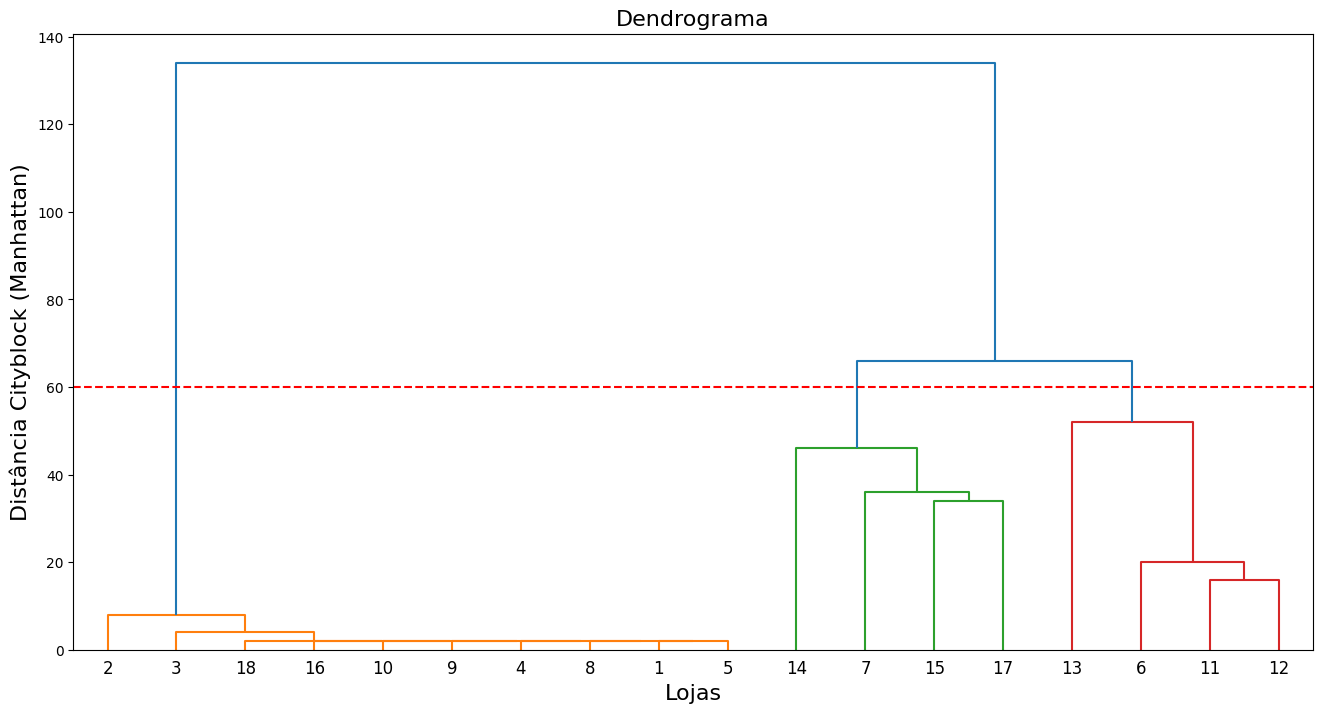

In [7]:
# Dendrograma
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(varejo, method = 'single', metric = 'cityblock')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 60, labels = list(varejista.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Cityblock (Manhattan)', fontsize=16)
plt.axhline(y = 60, color = 'red', linestyle = '--')
plt.show()

In [8]:
# OBS!!

# Metric options:
  ## euclidean
  ## sqeuclidean
  ## cityblock
  ## chebyshev
  ## canberra
  ## correlation

# Method options:
  ## single
  ## complete
  ## average

In [9]:
# Realizando o agrupamento para 3 clusters
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'cityblock', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(varejo)
varejista['cluster_single'] = indica_cluster_sing
varejista['cluster_single'] = varejista['cluster_single'].astype('category')

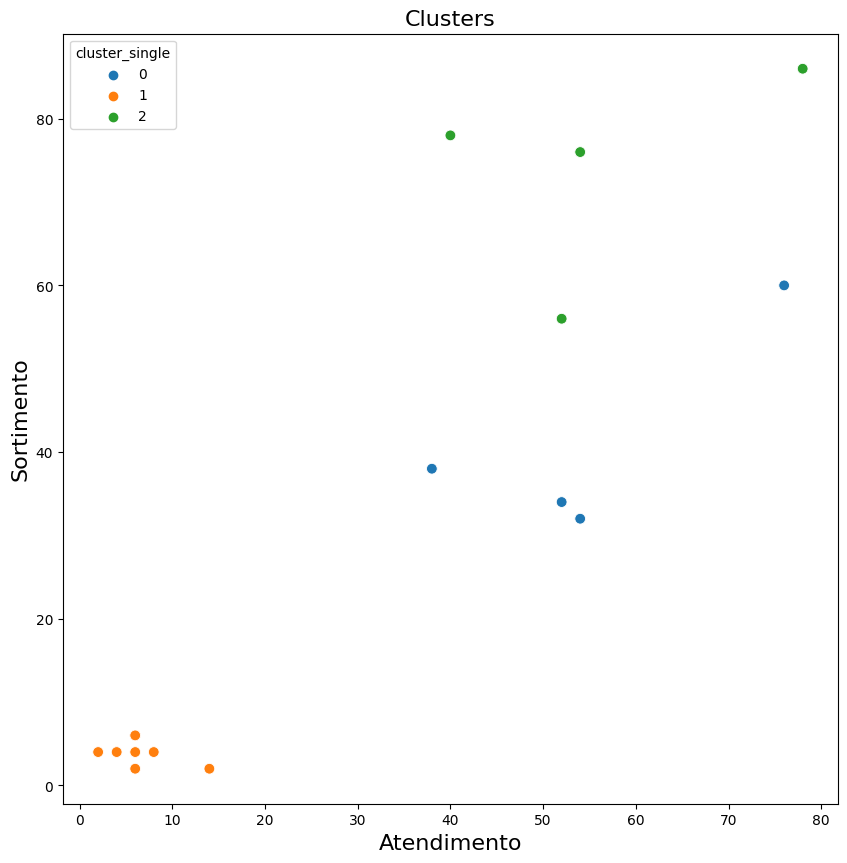

In [10]:
# Plotando as observações em seus clusters
plt.figure(figsize=(10,10))
fig = sns.scatterplot(x='atendimento', y='sortimento', s=60, data=varejista, hue='cluster_single')
plt.title('Clusters', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.show()

In [11]:
varejista.tail()

,loja,regional,atendimento,sortimento,organização,cluster_single
13,14,Regional 1,78,86,38,2
14,15,Regional 1,54,76,58,2
15,16,Regional 3,2,4,4,1
16,17,Regional 1,52,56,46,2
17,18,Regional 3,6,2,4,1


#### euclidiana + *complete-linkage*

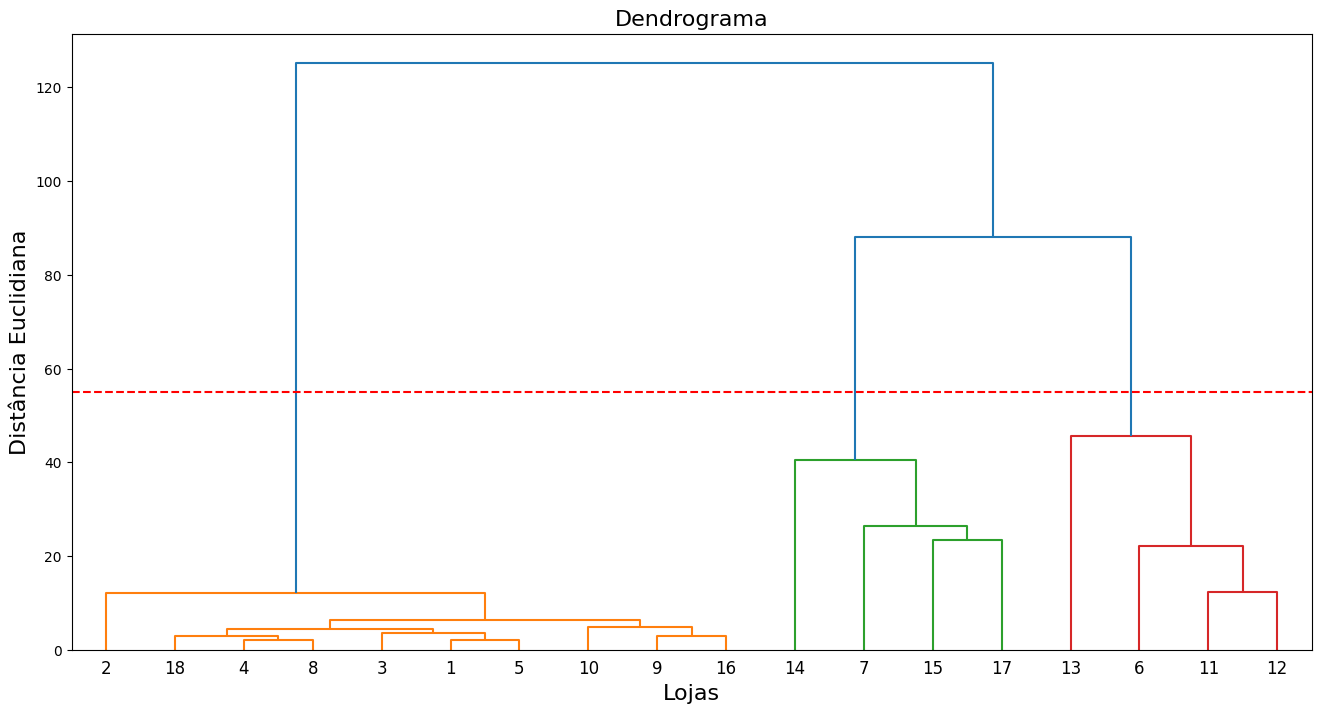

In [12]:
# Dendrograma
plt.figure(figsize=(16,8))
dend_sing_euc = sch.linkage(varejo, method = 'complete', metric = 'euclidean')
dendrogram_euc = sch.dendrogram(dend_sing_euc, color_threshold = 55, labels = list(varejista.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 55, color = 'red', linestyle = '--')
plt.show()

In [13]:
# Realizando o agrupamento para 3 clusters
cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(varejo)
varejista['cluster_complete'] = indica_cluster_comp
varejista['cluster_complete'] = varejista['cluster_complete'].astype('category')

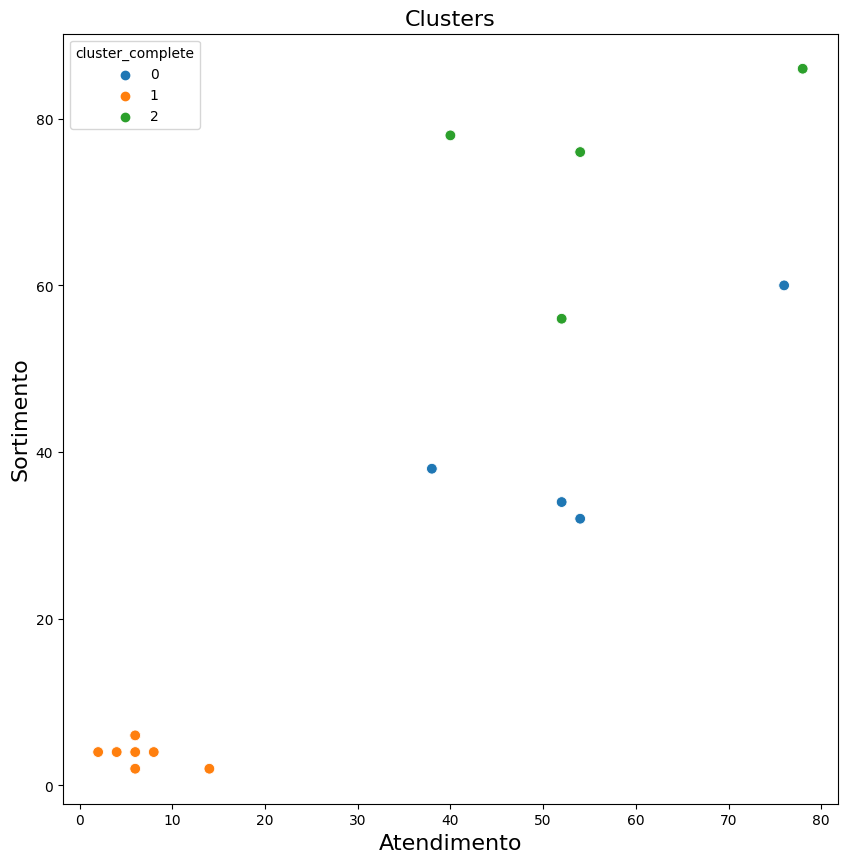

In [14]:
# Plotando as observações em seus clusters
plt.figure(figsize=(10,10))
fig = sns.scatterplot(x='atendimento', y='sortimento', s=60, data=varejista, hue='cluster_complete')
plt.title('Clusters', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.show()

In [15]:
varejista.tail()

,loja,regional,atendimento,sortimento,organização,cluster_single,cluster_complete
13,14,Regional 1,78,86,38,2,2
14,15,Regional 1,54,76,58,2,2
15,16,Regional 3,2,4,4,1,1
16,17,Regional 1,52,56,46,2,2
17,18,Regional 3,6,2,4,1,1


### Clusterização pelo método K-MEANS

In [16]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica
kmeans_varejista = KMeans(n_clusters=3, init='random', random_state=100).fit(varejo)

# Coluna para identificação dos clusters
kmeans_clusters = kmeans_varejista.labels_
varejista['cluster_kmeans'] = kmeans_clusters
varejista['cluster_kmeans'] = varejista['cluster_kmeans'].astype('category')

  File "c:\Users\madeinweb\Documents\GitHub\unsupervised-machine-learning\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [17]:
varejista.tail()

,loja,regional,atendimento,sortimento,organização,cluster_single,cluster_complete,cluster_kmeans
13,14,Regional 1,78,86,38,2,2,1
14,15,Regional 1,54,76,58,2,2,1
15,16,Regional 3,2,4,4,1,1,0
16,17,Regional 1,52,56,46,2,2,1
17,18,Regional 3,6,2,4,1,1,0


O padrão dos clusters não é o mesmo dos métodos hierárquicos anteriores!

#### Método da Silhueta

In [18]:
# Método da Silhueta para identificação do número de clusters
silhueta = []
I = range(2,9) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(varejo)
    silhueta.append(silhouette_score(varejo, kmeansSil.labels_))

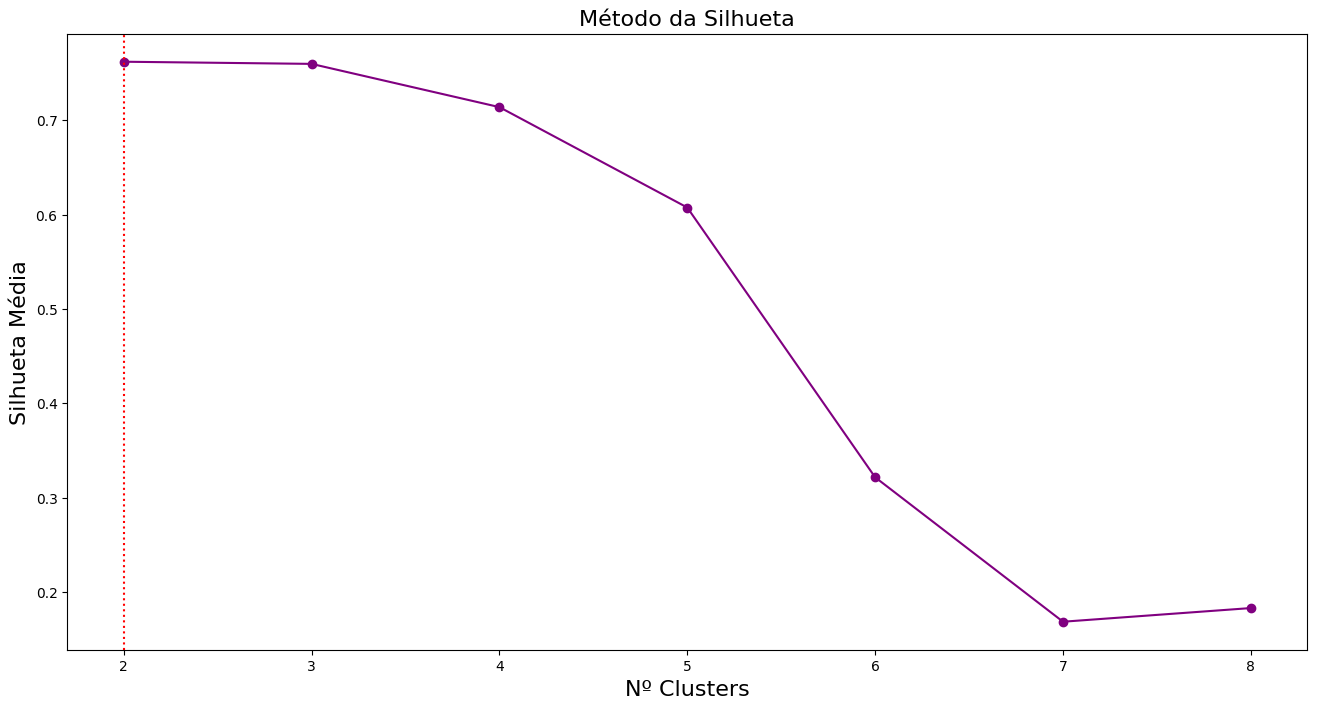

In [19]:
# Gráfico de Silhueta
plt.figure(figsize=(16,8))
plt.plot(range(2, 9), silhueta, color = 'purple', marker='o') # Ajustar range
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

A silhueta média é praticamente igual em 2 ou 3 clusters!<br>
Para aprimorar a interpretação, vamos manter 3 clusters!

In [20]:
# Coordenadas dos centróides nos clusters finais
cent_finais = pd.DataFrame(kmeans_varejista.cluster_centers_)
cent_finais.columns = varejo.columns
cent_finais.index.name = 'cluster'
cent_finais

,atendimento,sortimento,organização
cluster,,,
0,6.2,4.2,4.4
1,56.0,74.0,45.0
2,55.0,41.0,93.0


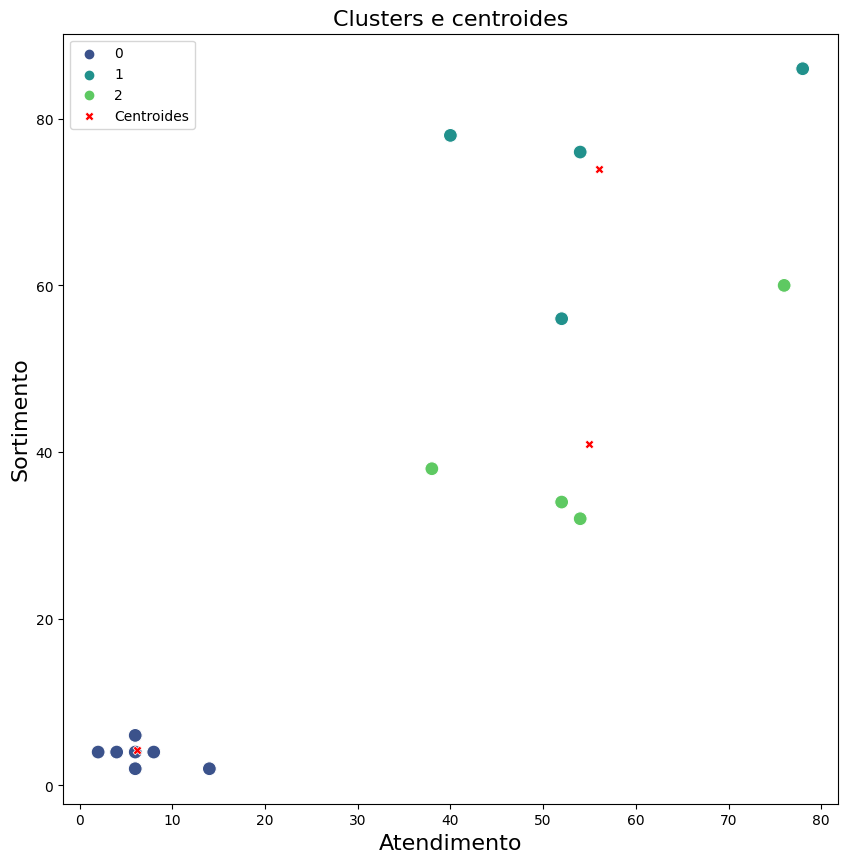

In [21]:
# Plotando as observações e seus centroides
plt.figure(figsize=(10,10))
sns.scatterplot(x='atendimento', y='sortimento', data=varejista, hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(x='atendimento', y='sortimento', data=cent_finais, s=40, c='red', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.legend()
plt.show()

In [22]:
# Gráfico 3D dos clusters 
fig = px.scatter_3d(varejista, 
                    x='atendimento', 
                    y='sortimento', 
                    z='organização',
                    color='cluster_kmeans')
fig.show()

In [23]:
# Estatísticas Descritivas por Cluster
analise_varejista = varejista.drop(columns=['loja']).groupby(by=['cluster_kmeans'])
analise_varejista.describe().T

cluster_kmeans             0          1           2
atendimento count  10.000000   4.000000    4.000000
            mean    6.200000  56.000000   55.000000
            std     3.190263  15.916449   15.705625
            min     2.000000  40.000000   38.000000
            25%     4.500000  49.000000   48.500000
            50%     6.000000  53.000000   53.000000
            75%     6.000000  60.000000   59.500000
            max    14.000000  78.000000   76.000000
sortimento  count  10.000000   4.000000    4.000000
            mean    4.200000  74.000000   41.000000
            std     1.475730  12.754084   12.909944
            min     2.000000  56.000000   32.000000
            25%     4.000000  71.000000   33.500000
            50%     4.000000  77.000000   36.000000
            75%     5.500000  80.000000   43.500000
            max     6.000000  86.000000   60.000000
organização count  10.000000   4.000000    4.000000
            mean    4.400000  45.000000   93.000000
            std     1.264911   9.451631    7.023769
            min     2.000000  38.000000   86.000000
            25%     4.000000  38.000000   87.500000
            50%     4.000000  42.000000   93.000000
            75%     5.500000  49.000000   98.500000
            max     6.000000  58.000000  100.000000

### Análise de variância de um fator (ANOVA)

Interpretação do output:

 cluster_kmeans MS: indica a variabilidade entre grupos (inter)<br>
 Within MS: indica a variabilidade dentro dos grupos (intra)<br>
 F: estatí­stica de teste (cluster_kmeans MS / Within MS)<br>
 p-unc: p-valor da estatí­stica F<br>
 se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais 
 (rejeição da hipótese nula -> a clusterização é adequada)

**Atendimento**

In [24]:
pg.anova(dv='atendimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,10804.177778,1591.6
DF,2,15
MS,5402.088889,106.106667
F,50.911871,NaN
p-unc,0.0,NaN
np2,0.871601,NaN


**Sortimento**

In [25]:
pg.anova(dv='sortimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,14804.177778,1007.6
DF,2,15
MS,7402.088889,67.173333
F,110.19386,NaN
p-unc,0.0,NaN
np2,0.936275,NaN


**Organização**

In [26]:
pg.anova(dv='organização', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,23155.377778,430.4
DF,2,15
MS,11577.688889,28.693333
F,403.497522,NaN
p-unc,0.0,NaN
np2,0.981752,NaN
